<h3>Does precipitation level has anything to do with accident count?</h3>

`US_Accidents_Dec21_updated.csv` and `WeatherEvents_Jan2016-Dec2021.csv` are the main data.<br>
`US_Accidents_Dec21_updated.csv` - accident records for all the states.<br>
`WeatherEvents_Jan2016-Dec2021.csv` - weather events for all the states.<br><br>

Data of 5 cities from different states are extracted and combined.<br>
Producing 5 tables, `[City].csv`, which has **date** (2016-01-01 -> 2021-12-31) as row.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
names = ["Denver", "Miami", "Minneapolis", "New York", "Phoenix"]
category = ['W0000_0600','W0601_1200','W1201_1800','W1801_2359','WS1','WS2','WS3','WS4','AS0000_0600','AS0601_1200','AS1201_1800','AS1801_2359','Accident']
city_count = len(names)
cities = [ 
 pd.read_csv(names[0] + '.csv')
,pd.read_csv(names[1] + '.csv')
,pd.read_csv(names[2] + '.csv')
,pd.read_csv(names[3] + '.csv')
,pd.read_csv(names[4] + '.csv')
]
cities_cat = []

In [3]:
for i in range(city_count):
	cities_cat.append(cities[i][category].astype('category'))

In [4]:
cities_cat[0].describe()

,W0000_0600,W0601_1200,W1201_1800,W1801_2359,WS1,WS2,WS3,WS4,AS0000_0600,AS0601_1200,AS1201_1800,AS1801_2359,Accident
count,2192,2192,2192,2192,506,342,344,408,2192,2192,2192,2192,2192
unique,7,6,6,6,5,4,4,5,5,5,5,5,2
top,Clear,Clear,Clear,Clear,Light,Light,Light,Light,0,0,0,0,True
freq,1686,1850,1848,1784,394,236,156,304,1244,1165,1495,1929,1476


In [5]:
print("Weather type: ", cities_cat[0]['W0000_0600'].unique(), end ='\n\n')
print("Weather severity: ", cities_cat[0]['WS1'].unique(), end ='\n\n')
print("Accident severity: ", cities_cat[0]['AS0000_0600'].unique())

Weather type:  ['Clear', 'Snow', 'Fog', 'Storm', 'Rain', 'Precipitation', 'Cold']
Categories (7, object): ['Clear', 'Snow', 'Fog', 'Storm', 'Rain', 'Precipitation', 'Cold']

Weather severity:  [NaN, 'Light', 'Moderate', 'Severe', 'UNK', 'Heavy']
Categories (5, object): ['Light', 'Moderate', 'Severe', 'UNK', 'Heavy']

Accident severity:  [0, 2, 3, 4, 1]
Categories (5, int64): [0, 2, 3, 4, 1]


Types of analysis to do (Add if you think it is relevant):
   1. Correlation Matrix / Heatmap [ sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f") ]
   2. No. of Weathers that occur from 2016 to 2021
   3. Total no. of accidents that happened for each weathers 
      [ legnd_data = pkmndata[pkmndata["Legendary"] == True] , print("Number of Legendary Pokemons :", len(legnd_data)) ]
   4. Uni-Variate Linear Regression (Predictor = precipitation)
   5. Goodness of Fit of the Model
   6. Regression with random train-test split
   7. Simple Decision tree (Response = Accident[T/F], Predictor = precipitation) [done in 
   8. Classification tree with Random Train-Test Split [done] 
   9. Prediction of Accident [can be done after finalising the rest]

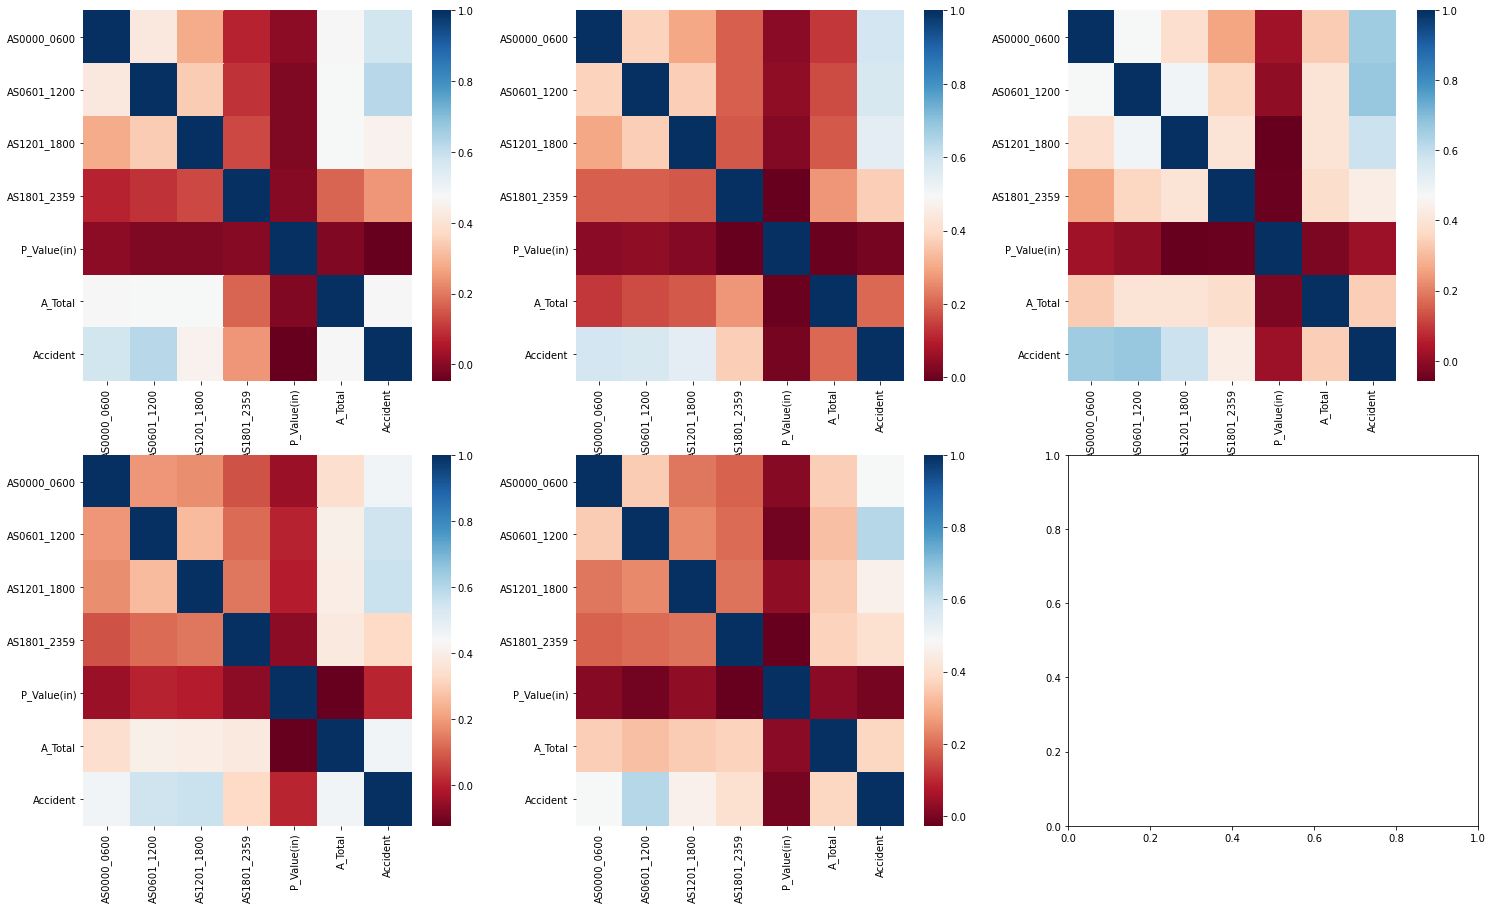

In [6]:
f, axes = plt.subplots(2, 3, figsize=(25, 15))

for i in range(5):
	sb.heatmap(cities[i].corr(), ax = axes[int(i/3),i%3], cmap = "RdBu")

It seems to be have no relationship between preciptation level and accident count.

In [7]:
cities_cat[0].head()

,W0000_0600,W0601_1200,W1201_1800,W1801_2359,WS1,WS2,WS3,WS4,AS0000_0600,AS0601_1200,AS1201_1800,AS1801_2359,Accident
0,Clear,Clear,Clear,Clear,NaN,NaN,NaN,NaN,0,0,0,0,False
1,Clear,Clear,Clear,Clear,NaN,NaN,NaN,NaN,0,0,0,0,False
2,Clear,Clear,Clear,Clear,NaN,NaN,NaN,NaN,0,0,0,0,False
3,Clear,Clear,Clear,Clear,NaN,NaN,NaN,NaN,0,0,0,0,False
4,Clear,Clear,Clear,Clear,NaN,NaN,NaN,NaN,0,0,0,0,False


<h3>Weather type vs Accident count</h3>

Row order:
1. Denver
2. Miami
3. Minneapolis
4. New York
5. Phoenix

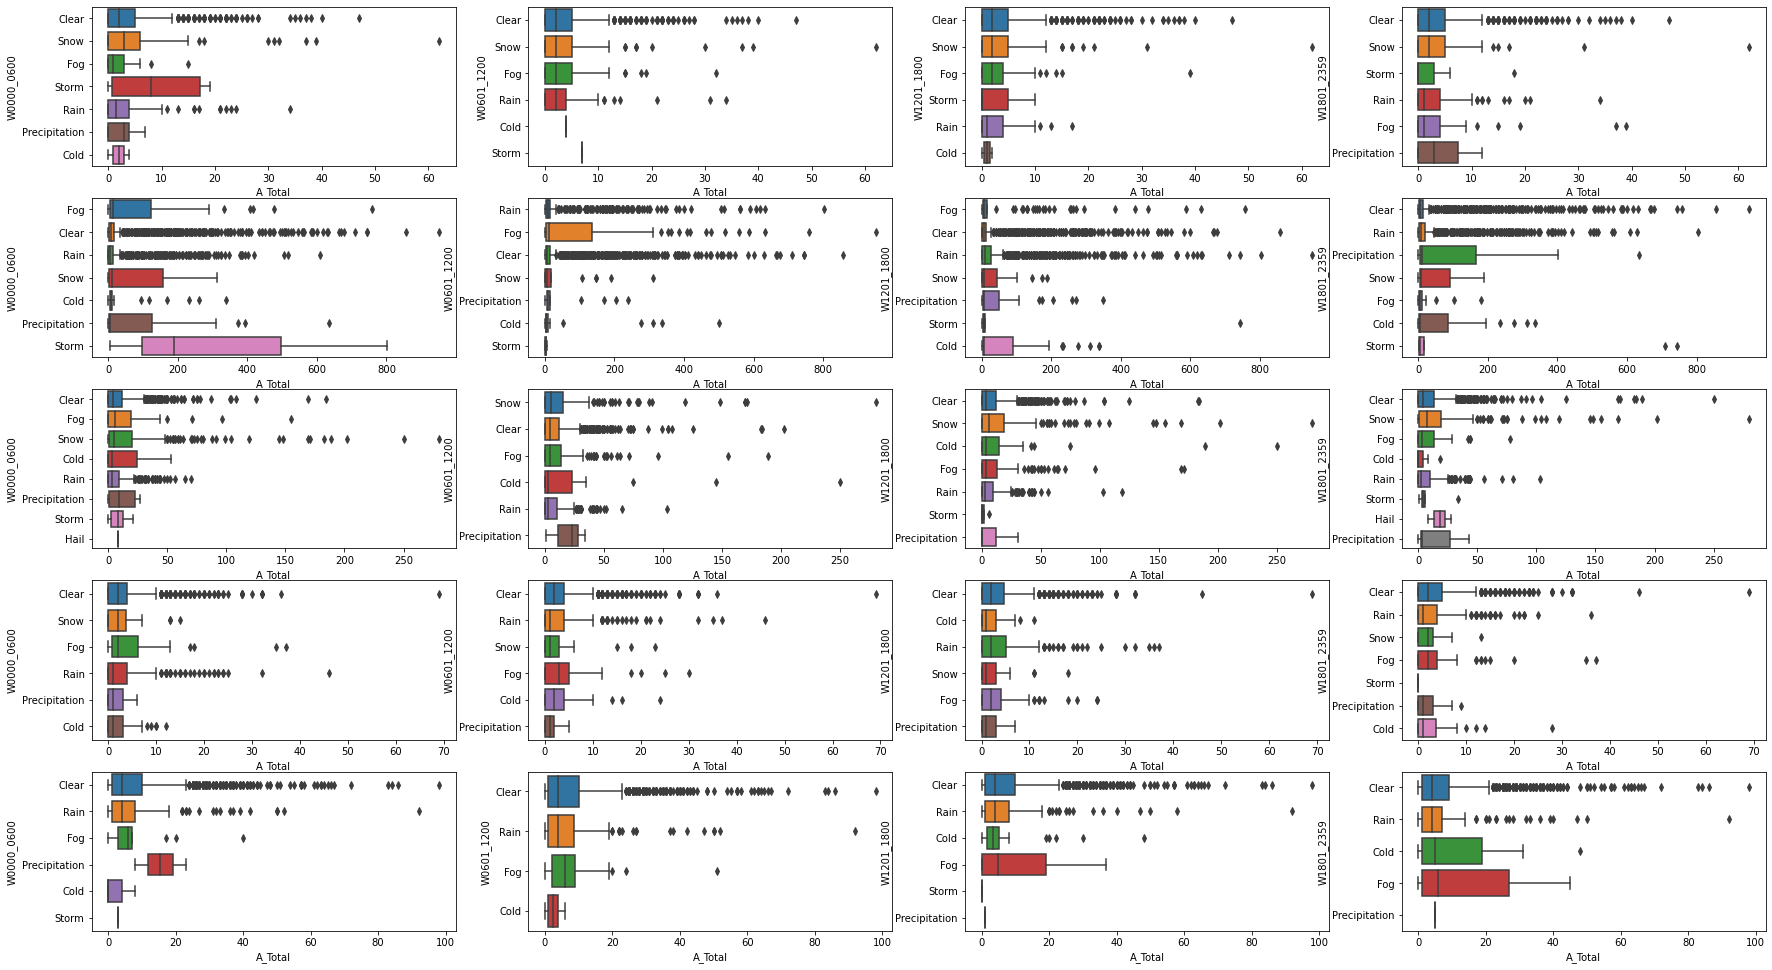

In [8]:
f, axes = plt.subplots(5, 4, figsize=(30, 17))
for i in range(city_count):
	for j in range(4):
		sb.boxplot(x = 'A_Total', y = category[j] , data = cities[i], orient = 'h', ax = axes[i,j])

<h3>Weather serverity vs Accident count</h3>

Row order:
1. Denver
2. Miami
3. Minneapolis
4. New York
5. Phoenix

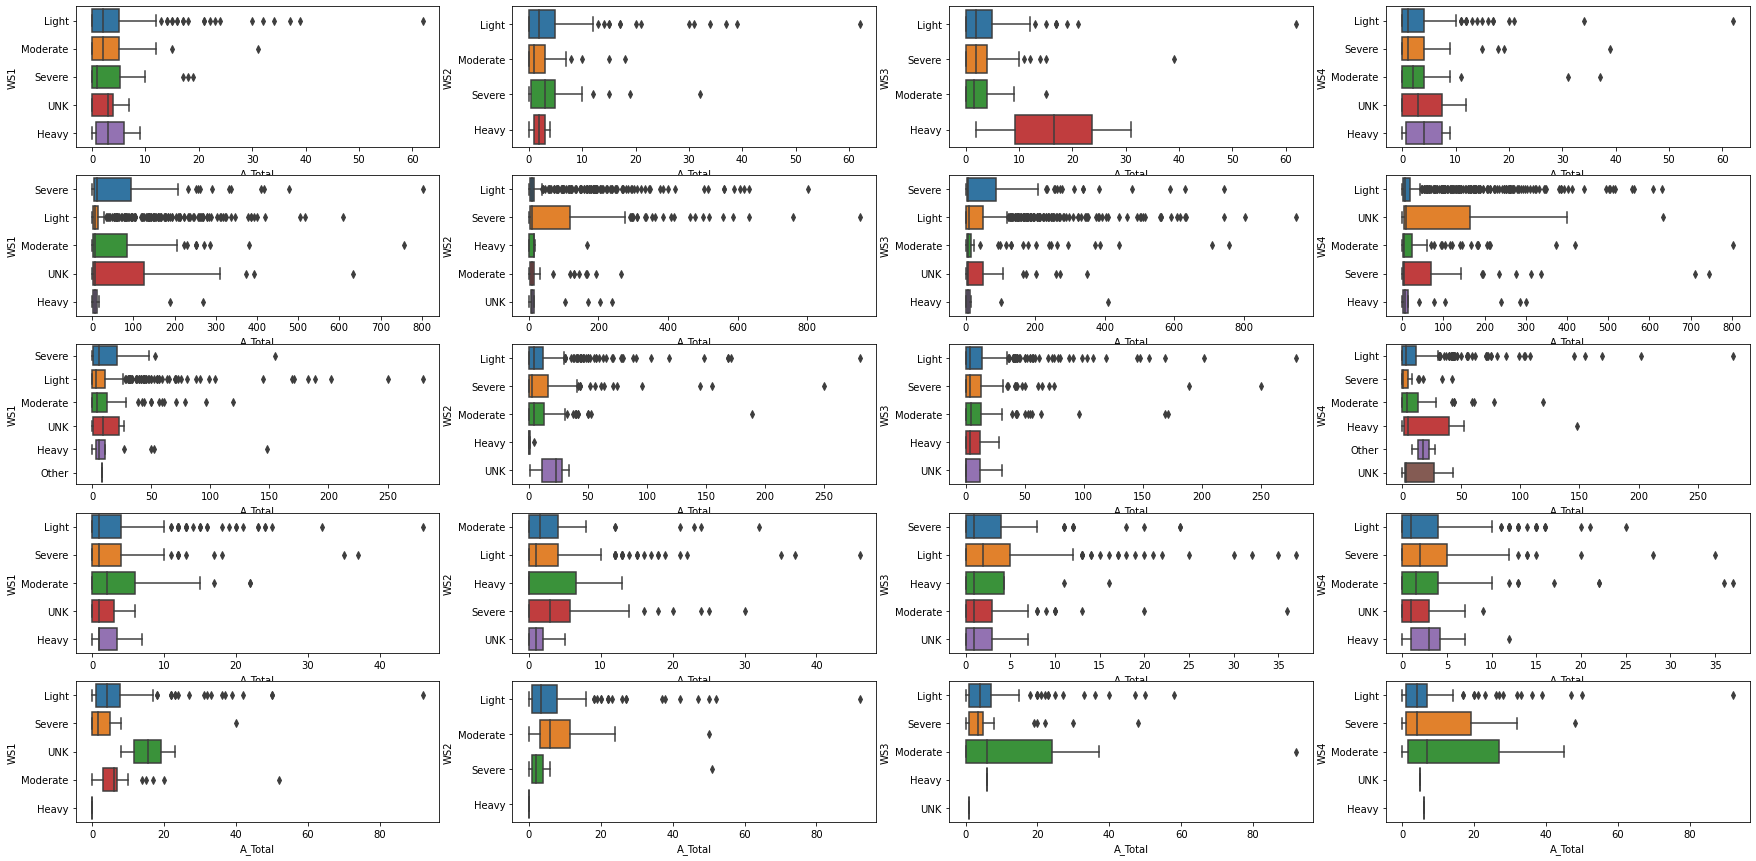

In [9]:
f, axes = plt.subplots(5, 4, figsize=(30, 15))
for i in range(city_count):
	for j in range(4):
		sb.boxplot(x = 'A_Total', y = category[j + 4] , data = cities[i], orient = 'h', ax = axes[i,j])



Row order:
1. Denver
2. Miami
3. Minneapolis
4. New York
5. Phoenix

In [58]:
weather = [[0]*4]*5
for i in range(city_count):
	for j in range(4):
		weather[i][j] = pd.DataFrame(cities[i][category[j]])

        
accdnt = [[0]*4]*5
for i in range(city_count):
	for j in range(4):
		accdnt[i][j] = pd.DataFrame(cities[i][category[j+8]])
		accdnt[i][j] = accdnt[i][j].replace({0: False, 1: True, 2: True, 3: True, 4: True, 5: True})


[[     W0000_0600
0         Clear
1         Clear
2         Clear
3         Clear
4          Rain
...         ...
2187      Clear
2188       Rain
2189       Rain
2190      Clear
2191       Rain

[2192 rows x 1 columns],      W0601_1200
0         Clear
1         Clear
2         Clear
3         Clear
4          Rain
...         ...
2187      Clear
2188      Clear
2189       Rain
2190      Clear
2191       Rain

[2192 rows x 1 columns],      W1201_1800
0         Clear
1         Clear
2         Clear
3         Clear
4          Rain
...         ...
2187      Clear
2188      Clear
2189      Clear
2190      Clear
2191       Rain

[2192 rows x 1 columns],      W1801_2359
0         Clear
1         Clear
2         Clear
3          Rain
4          Rain
...         ...
2187      Clear
2188       Rain
2189      Clear
2190      Clear
2191       Rain

[2192 rows x 1 columns]], [     W0000_0600
0         Clear
1         Clear
2         Clear
3         Clear
4          Rain
...         ...
2187      Cl

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5085158150851582

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.49452554744525545

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6161800486618005

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6441605839416058

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5249391727493917

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5583941605839416

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5967153284671532

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6259124087591241

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5091240875912408

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.45985401459854014

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6277372262773723

Goodness of Fit of Model 	Test Dataset
Classif

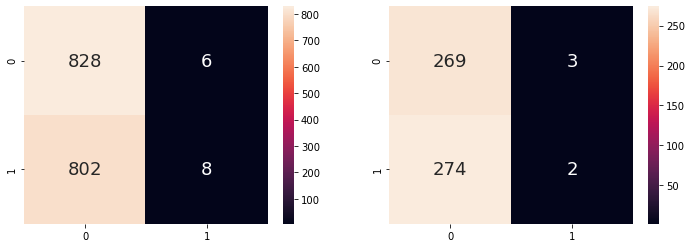

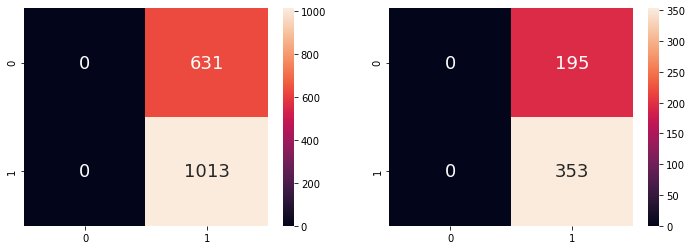

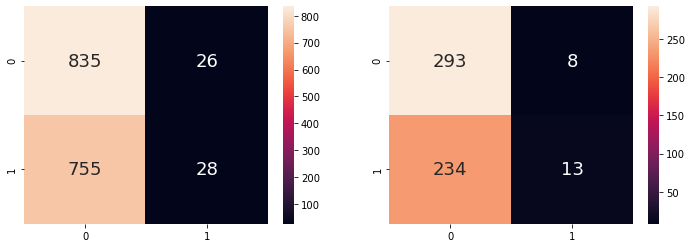

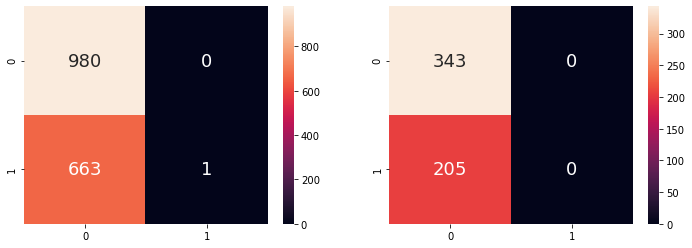

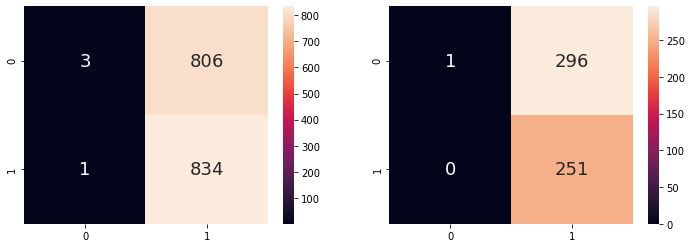

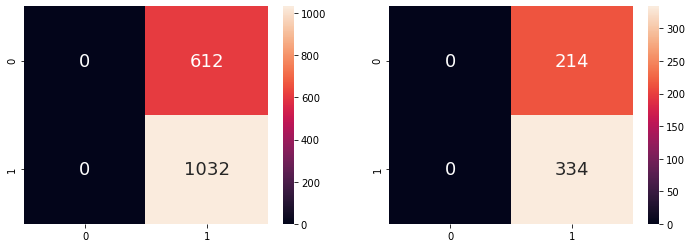

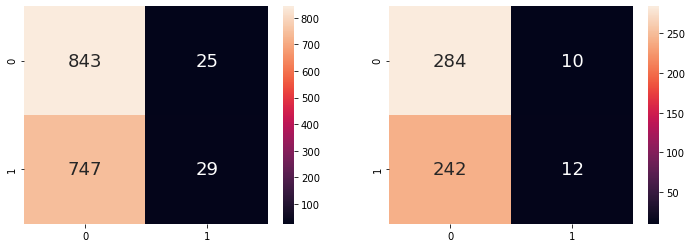

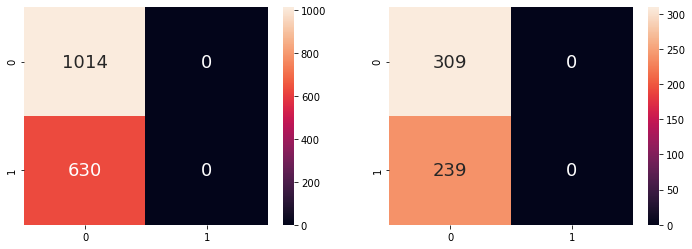

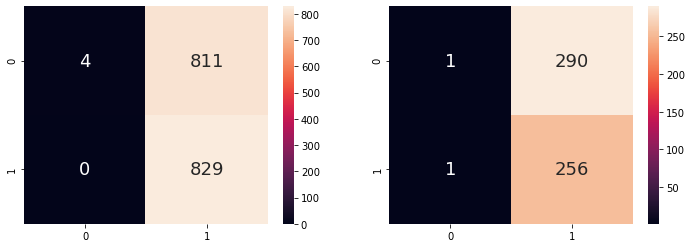

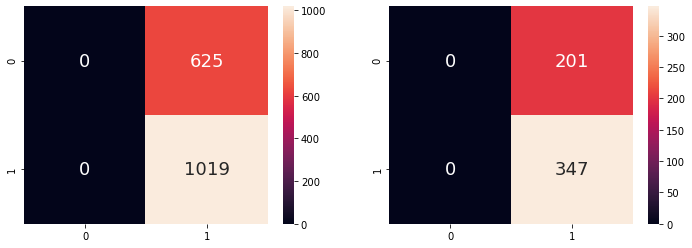

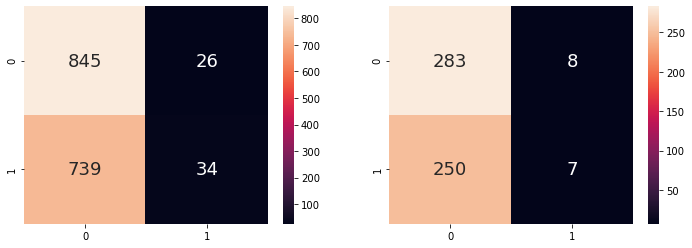

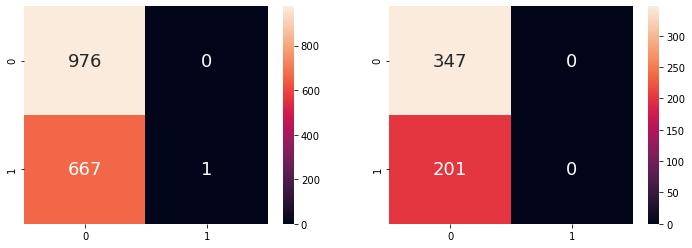

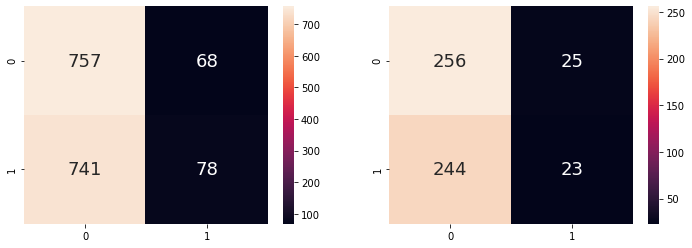

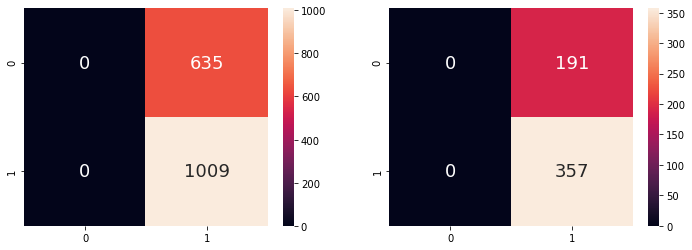

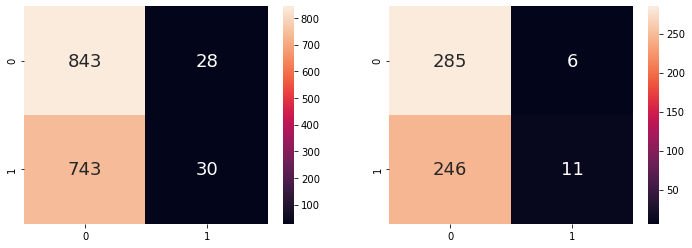

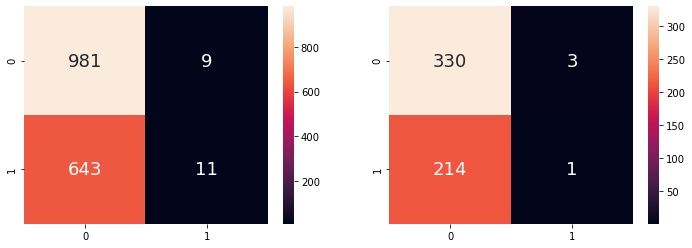

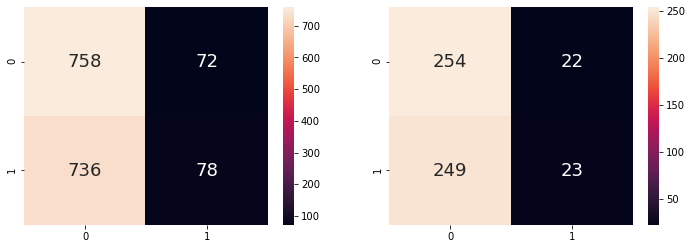

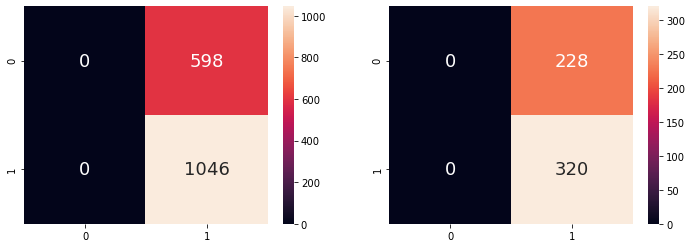

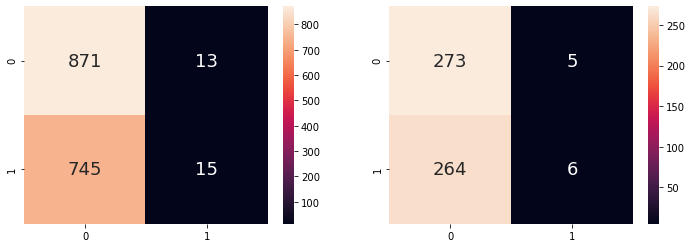

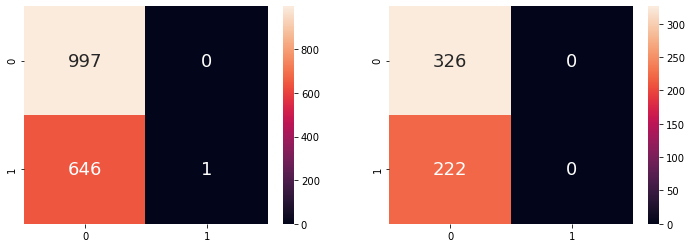

In [64]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 4)

odata = [[0]*4]*5
for i in range(city_count):
	for j in range(4):
		odata[i][j] = pd.get_dummies(weather[i][j])

for i in range(city_count):
	for j in range(4):
		X_train, X_test, y_train, y_test = train_test_split(odata[i][j], accdnt[i][j], test_size = 0.25)
		dectree.fit(X_train, y_train)
		y_train_pred = dectree.predict(X_train)
		y_test_pred = dectree.predict(X_test)
		print("Goodness of Fit of Model \tTrain Dataset")
		print("Classification Accuracy \t:", dectree.score(X_train, y_train))
		print()
		print("Goodness of Fit of Model \tTest Dataset")
		print("Classification Accuracy \t:", dectree.score(X_test, y_test))
		print()
		f, axes = plt.subplots(1, 2, figsize=(12, 4))
		sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
		sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
        

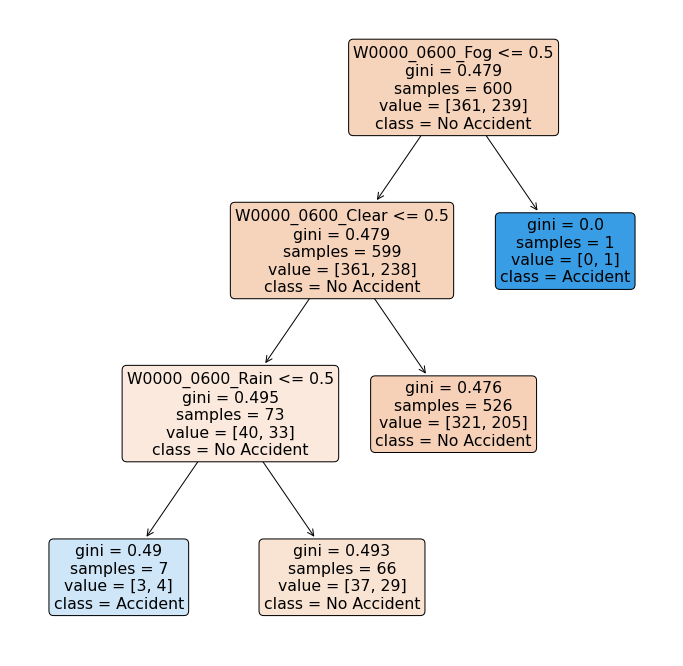

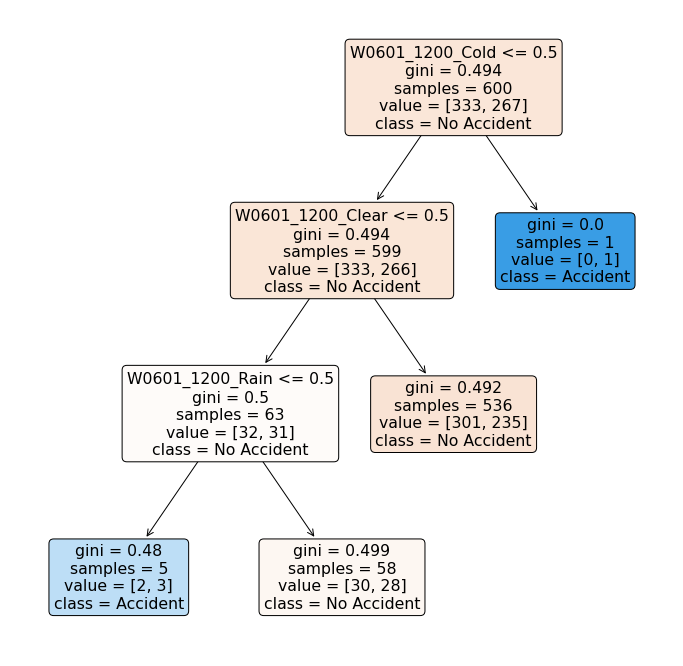

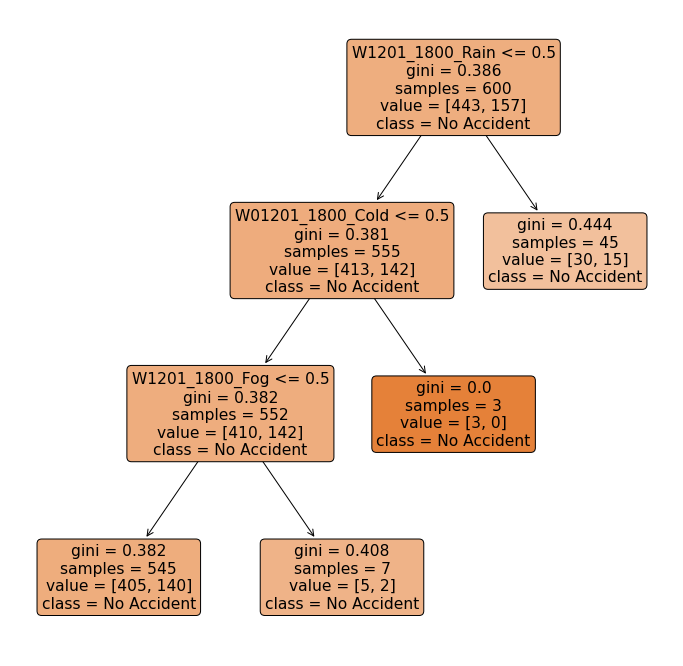

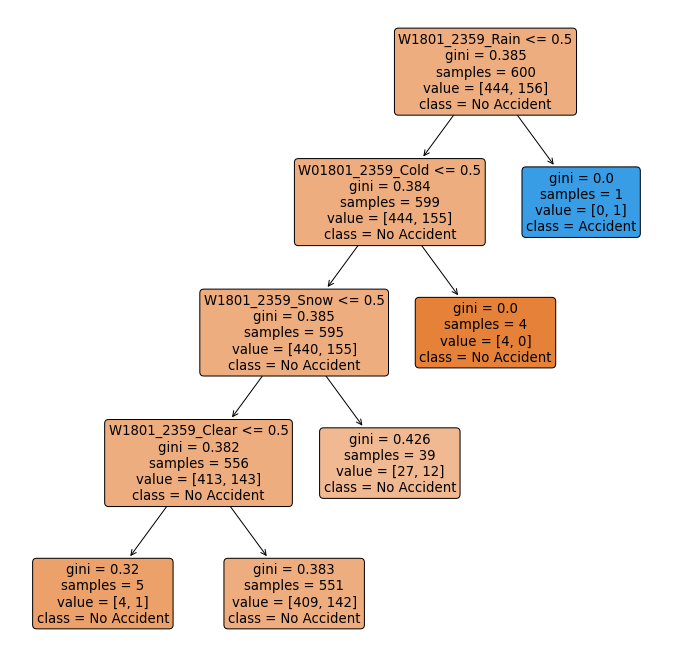

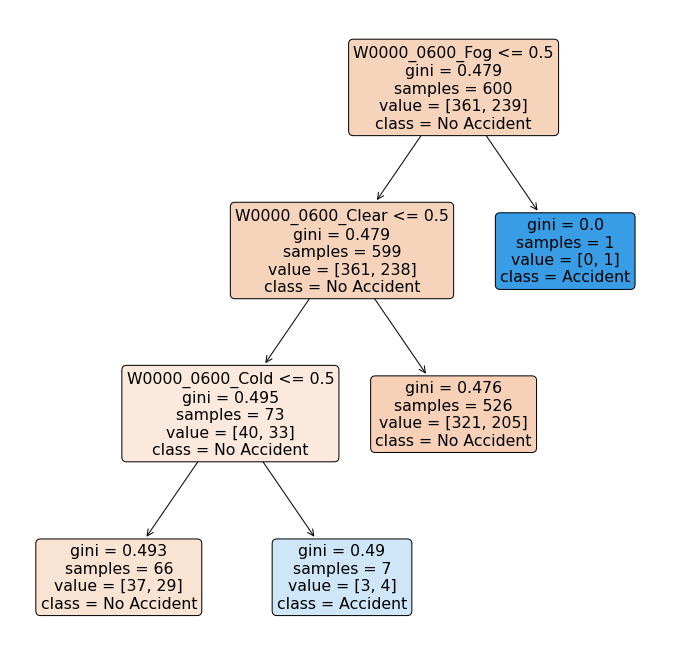

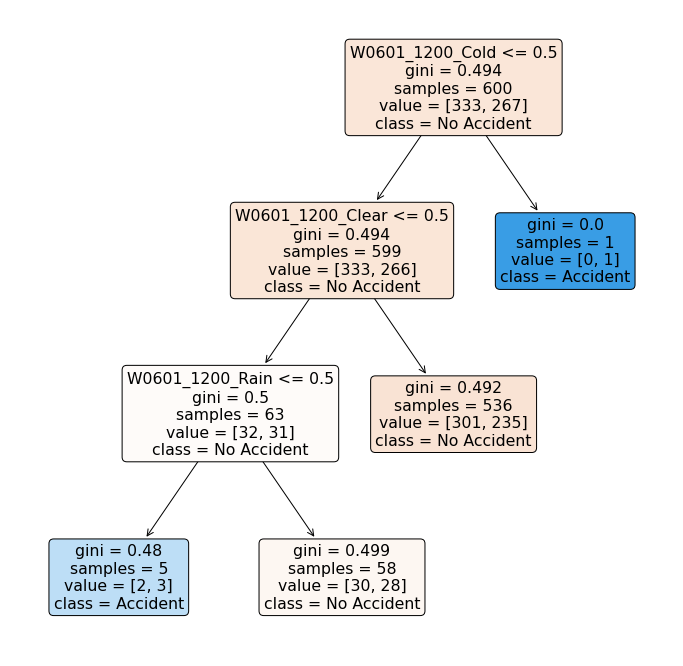

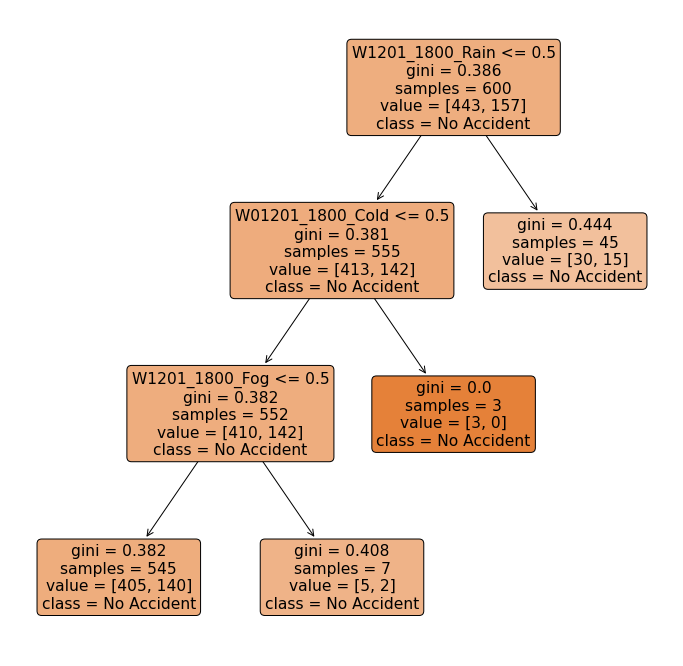

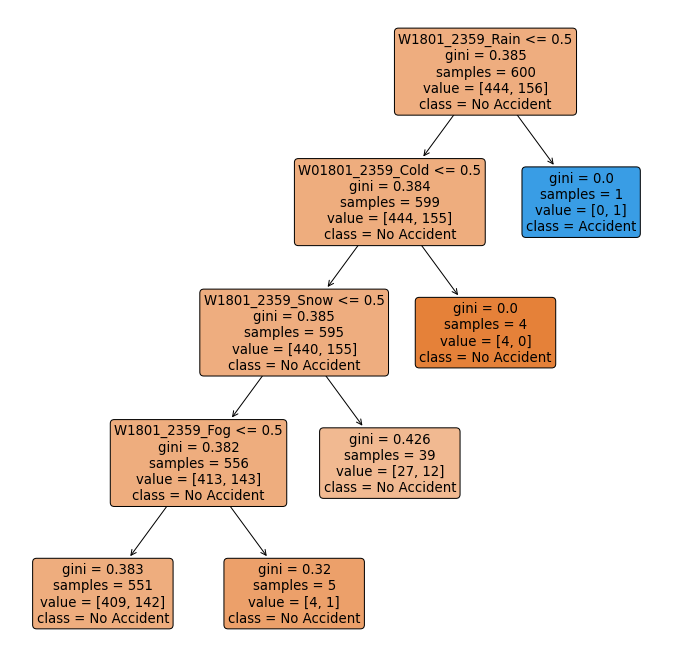

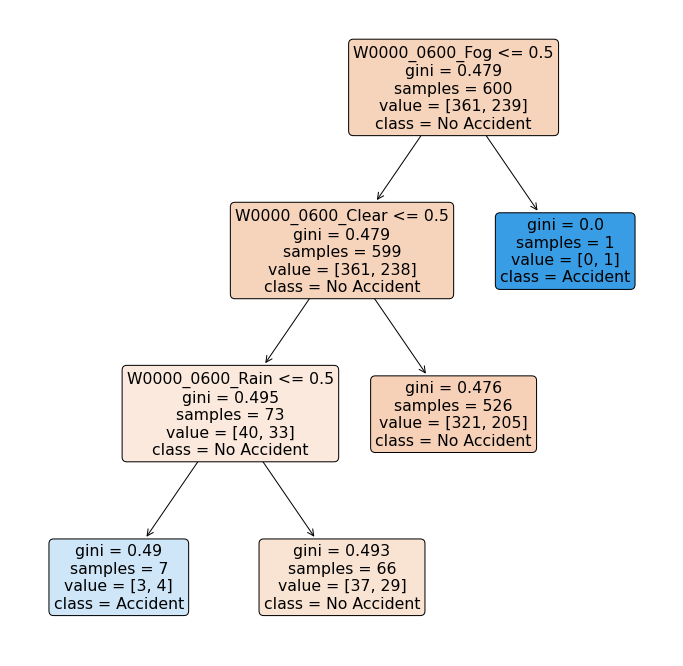

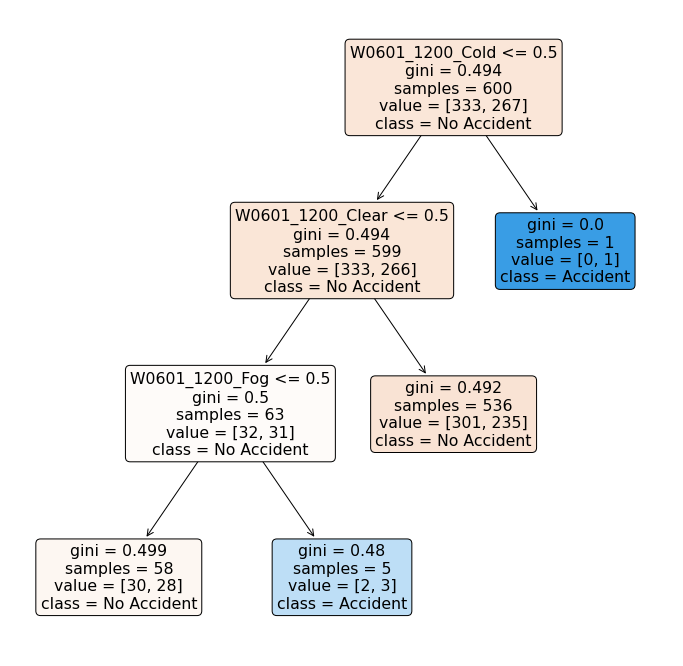

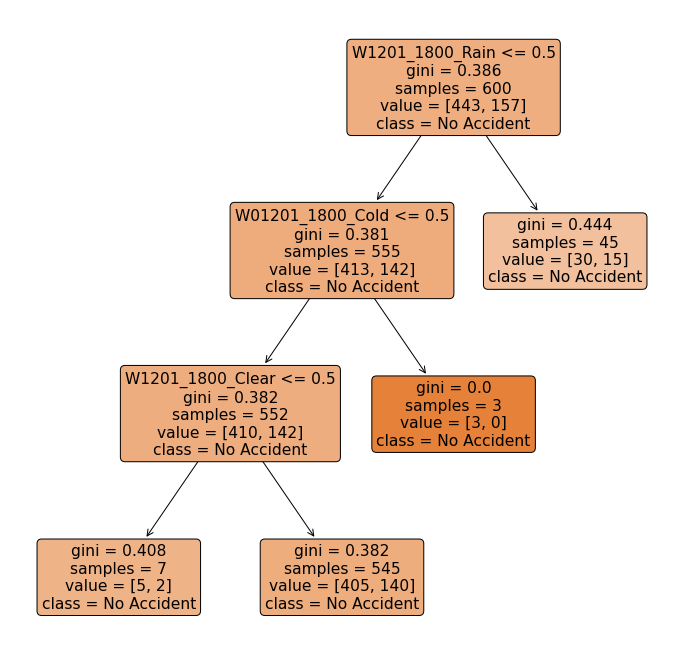

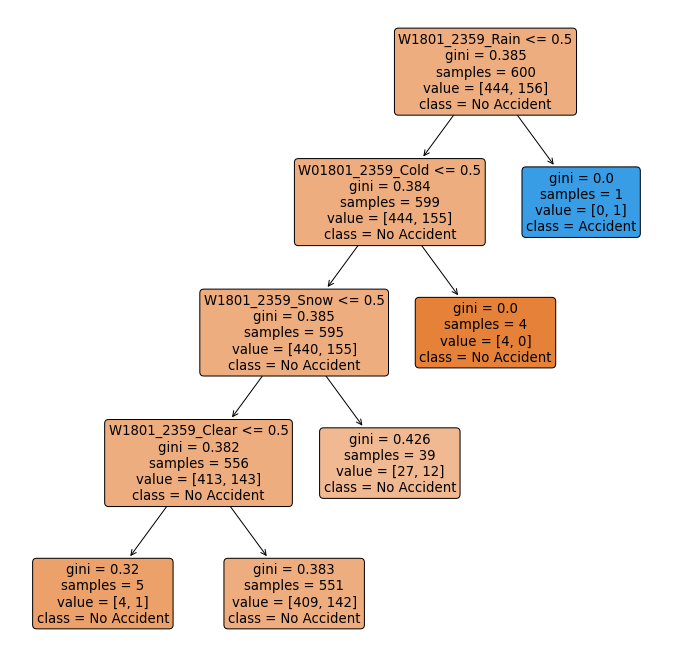

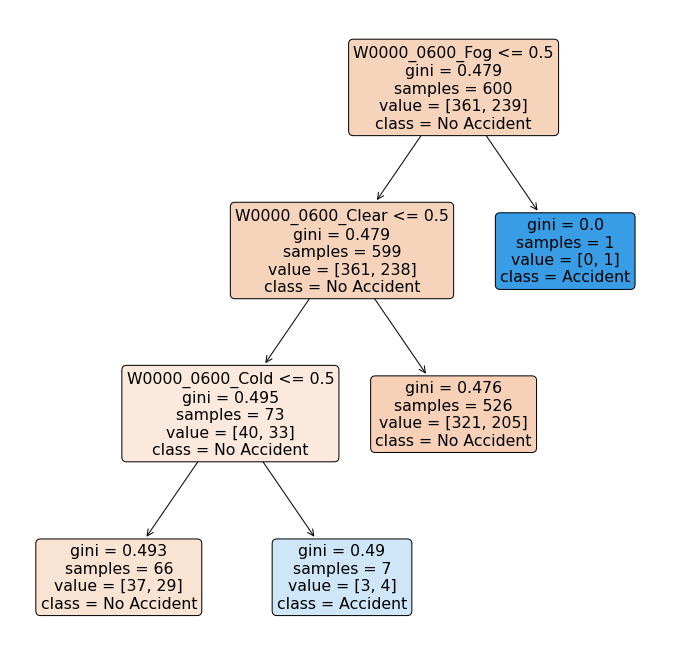

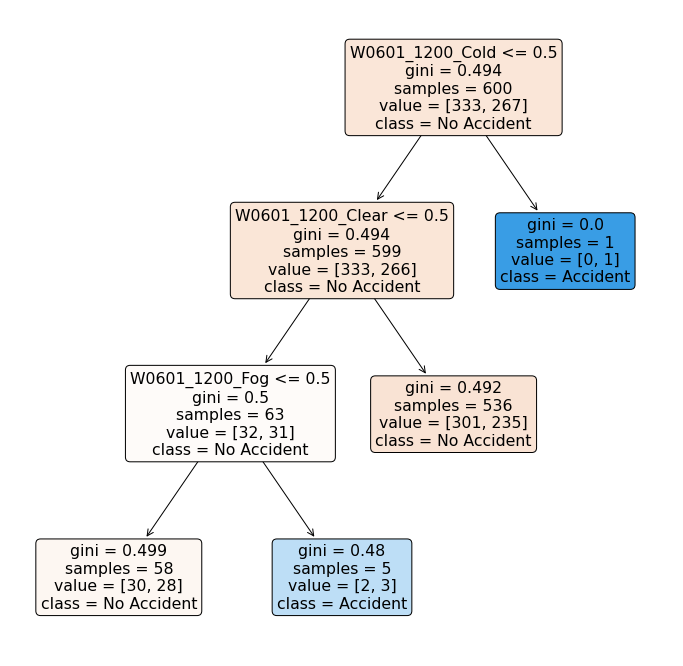

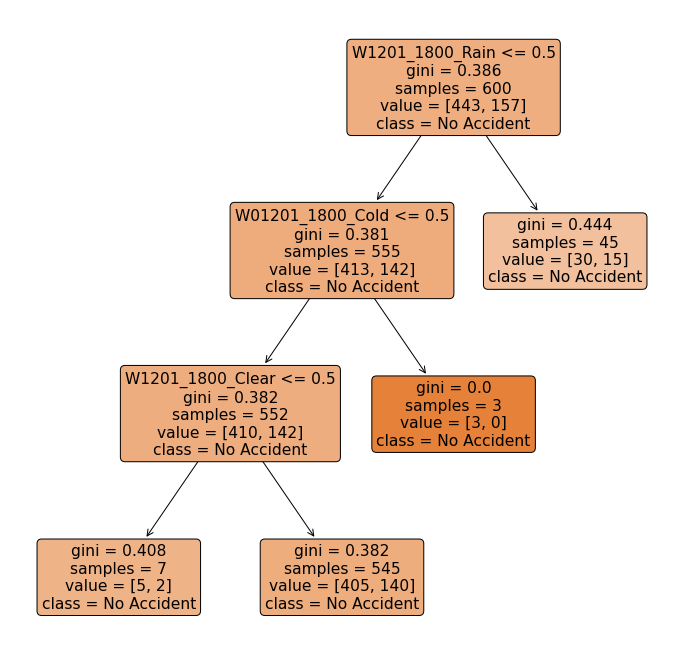

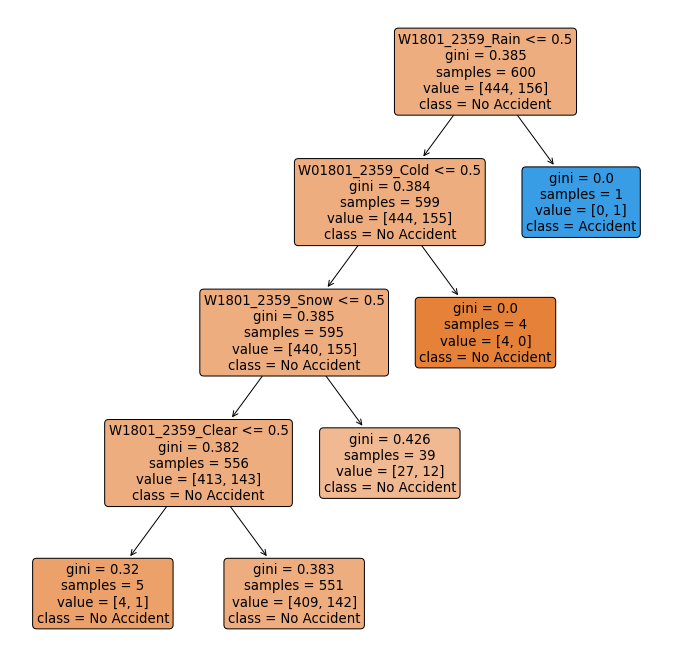

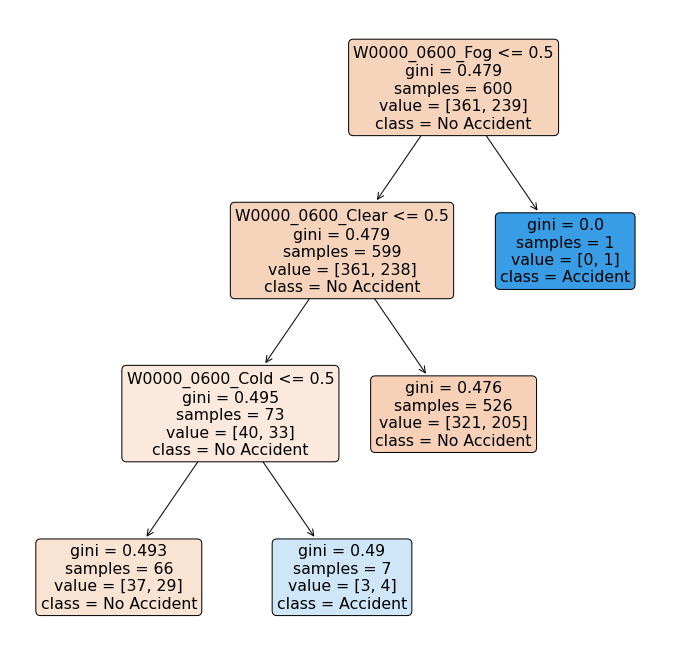

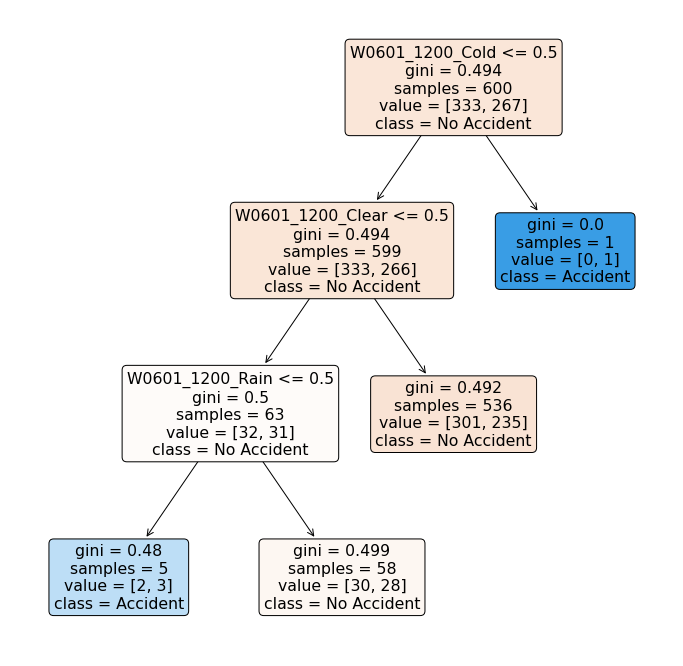

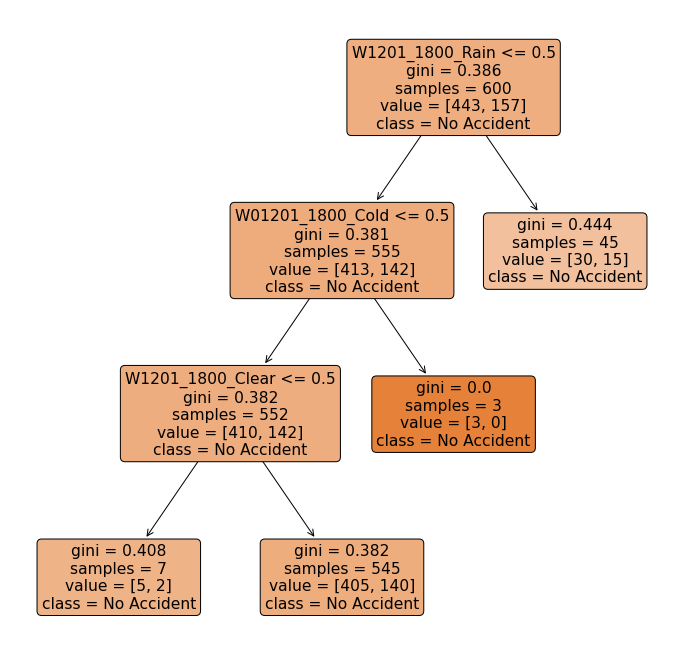

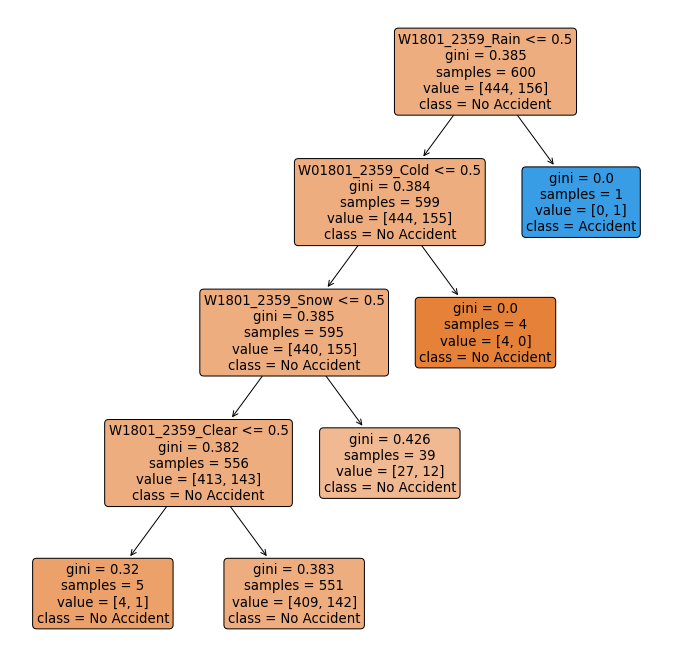

In [65]:
for i in range(city_count):
	for j in range(4):
		dectree.fit(odata_train[i][j], accdnt_train[i][j])
		f = plt.figure(figsize=(12,12))
		plot_tree(dectree, filled=True, rounded=True, feature_names= feature_col[j], class_names=['No Accident', 'Accident'])

In [68]:
print(cities_cat[0])

     W0000_0600 W0601_1200 W1201_1800 W1801_2359  WS1    WS2    WS3  WS4  \
0         Clear      Clear      Clear      Clear  NaN    NaN    NaN  NaN   
1         Clear      Clear      Clear      Clear  NaN    NaN    NaN  NaN   
2         Clear      Clear      Clear      Clear  NaN    NaN    NaN  NaN   
3         Clear      Clear      Clear      Clear  NaN    NaN    NaN  NaN   
4         Clear      Clear      Clear      Clear  NaN    NaN    NaN  NaN   
...         ...        ...        ...        ...  ...    ...    ...  ...   
2187      Clear      Clear      Clear      Clear  NaN    NaN    NaN  NaN   
2188      Clear       Snow       Snow      Clear  NaN  Light  Light  NaN   
2189      Clear      Clear      Clear      Clear  NaN    NaN    NaN  NaN   
2190      Clear      Clear      Clear      Clear  NaN    NaN    NaN  NaN   
2191      Clear      Clear      Clear      Clear  NaN    NaN    NaN  NaN   

     AS0000_0600 AS0601_1200 AS1201_1800 AS1801_2359 Accident  
0              0       